
[Sensibilidad y Especificidad](https://es.wikipedia.org/wiki/Sensibilidad_y_especificidad)


*Sensiblidad*:  capacidad de la prueba para detectar un sujeto enfermo, en otras palabras, ¿Cual es la probabilidad de que el resultado sea postivo?.

Probabilidad de que la prueba indentifique como enfermo aquel que realmente esta:

$S = \frac{Verdadedor Positivos}{Total Enfermos}=\frac{VP}{VP+FN}$


*Especificidad*: Indentifiar como sanos a los que realmente lo son.

$E = \frac{Verdadedor Negativos}{Total  de NO Enfermos}=\frac{VN}{VN+FP}$




In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm

In [2]:
def pdf(x, mean1 = 10, mean2=16, desv1=2, desv2=2):
  fig, ax = plt.subplots(1, 1)
  
  f1 = stats.norm(loc = mean1, scale = desv1)
  f2 = stats.norm(loc = mean2, scale = desv2)
  ax.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1')
  ax.plot(x, f2.pdf(x),'b-', lw = 3, alpha = 0.6, label='pdf 2')  
  ax.set_xlabel("x")
  ax.set_ylabel("PDF(X)")
  return "Done", f1, f2

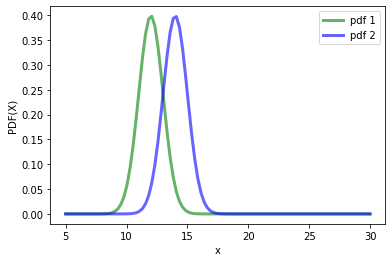

In [10]:
x=np.linspace(5, 30,100)
_, f1, f2 = pdf(x, mean1 = 12, mean2 = 14, desv1 = 1, desv2 = 1)
plt.legend()

In [11]:
random_1 = f1.rvs(1000)
random_2 = f2.rvs(1000)


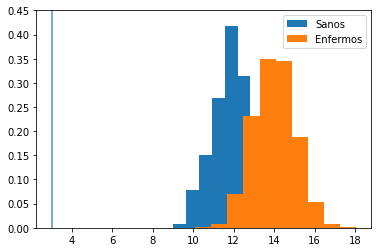

In [29]:
boundary = 3
plt.figure()
plt.hist(random_1, density=True, label="Sanos")
#plt.plot(x, f1.pdf(x))
plt.hist(random_2, density=True, label="Enfermos")
plt.vlines(boundary, 0, 1, alpha=0.8)
#plt.plot(x, f2.pdf(x))
plt.ylim(0,0.45)
plt.legend()
plt.show()

Especificidad:
Probabilidad de indentifiar como sanos a los que realmente lo son.


$E = \frac{VN}{VN+FP}$

In [30]:
VN = (random_1<boundary).sum()
FP = (random_1>boundary).sum()
E = VN/(VN+FP)
E

0.0

Sensibilidad

Probabilidad de que la prueba indentifique como enfermo aquel que realmente esta

$S = \frac{VP}{VP+FN}$

In [31]:
VP = (random_2>boundary).sum()
FN = (random_2<boundary).sum()
S = VP/(VP+FN)
S

1.0

Para diferentes fronteras como es la sensiblidad como funcion de la especificidad 1-E. 
Curvas Roc https://es.wikipedia.org/wiki/Curva_ROC

In [32]:
boundary_=np.linspace(2,20,100)
E_=[]
S_=[]
for b in boundary_:
  VN = (random_1<b).sum()
  FP = (random_1>b).sum()
  E = VN/(VN+FP)
  E_.append(E)

  VP = (random_2>b).sum()
  FN = (random_2<b).sum()
  S = VP/(VP+FN)  
  S_.append(S)

Text(0, 0.5, 'S')

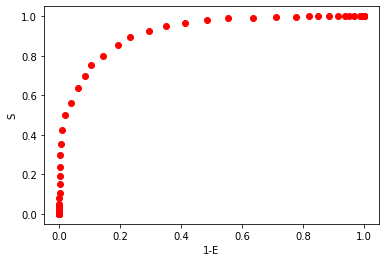

In [33]:
plt.plot( (1-np.array(E_)), np.array(S_),"ro")
plt.xlabel("1-E")
plt.ylabel("S")

In [26]:
#¿Que pasa si las distribuciones estan muy juntas?